## Reading the npz for summary data
<a id = top></a>
 - [reading files](#reading)
 - [plotting](#plotting) the alignment
 - Plotting the [spread](#spread) of angles over time
 - [Averaging](#average) the spread from many iterations of experiments
 - Comparing [iterations](#iterations) of alignment

 - [stream](#stream) plots
 - 2D [histograms](#hist) 




In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
plt.style.use("default")

<a id = "reading"></a>
## Reading the data

In [2]:
# dir = "wall implemetation\wall_size_experiment\wall_64"
dir = str(os.getcwd())
filenames = os.listdir(os.getcwd())

wall_lengths = []
folders = []

stream_list_x = []
stream_list_y = []
stream_boundaries = []

## Dictionary for storing the data

def read_summary_file(filepath):
    summary_data = {}
    with open(filepath, 'r') as file:
        for line in file:
            # Split the line into key and value
            key, value = line.strip().split(': ')
            # Store the key-value pair in the dictionary
            summary_data[key] = float(value) if '.' in value or value.isdigit() else value
    return summary_data

simulations = []
def reading_alignment_npz(filenames, simulations, iteration = 0, alignment = True): #, hist = True, stream = True):
    for item in filenames:
        
        
        if item[:7] == "wall128":
            data = {"wall length": 0, "stream": 0, "histogram":0, "angle": 0, "angle_std": 0, "steps": 0, "alignment_average": 0}
            folder = dir + "/" + item
            wall_length = item.split("_")[1]
            data["wall length"] = float(wall_length)

            if alignment:
                ### Loading alignment data
                alignment_data = np.load(folder + f"/alignment_{wall_length}_{iteration}.npz")
                data["angle"] = alignment_data["angles"]
                data["angle_std"] = alignment_data["std"]

            ### Loading summary data
            summary_file = folder + f"/simulation_parameters_{wall_length}.txt"
            summary_data = read_summary_file(summary_file)
            data["steps"] = summary_data['Total number of steps']
            data["alignment_average"] = summary_data['Alignment average steps']
            data["rho"] = summary_data["Density (rho)"]
            data["eta"] = summary_data["Noise/randomness (eta)"]
            data["iteration"] = iteration

            simulations.append(data)
    return simulations

for i in range(6):
    simulations = reading_alignment_npz(filenames, simulations, iteration=i)

len(simulations)

36

In [3]:
simulations[0]

{'wall length': 0.0,
 'stream': 0,
 'histogram': 0,
 'angle': array([ 0.57837283, -2.0973635 , -1.78969857, ..., -1.91713566,
        -1.92966633, -1.93247836]),
 'angle_std': array([ 3.16192296, -2.96926838,  2.81213913, ...,  0.58789425,
         0.59168781,  0.58577108]),
 'steps': 10000.0,
 'alignment_average': 10.0,
 'rho': 1.0,
 'eta': 0.1,
 'iteration': 0}

<a id = "plotting"></a>
[top](#top)
# Plotting the alignment

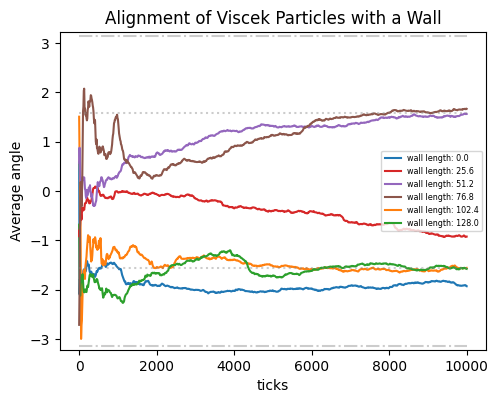

In [4]:
text_width = 5.5
fig_width = text_width
fig_height = 0.75* fig_width
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

lines = []
wall_lengths = []

iteration = 0
for simulation in simulations[6*iteration:6*(1+iteration)]:
    angle = simulation["angle"]
    steps = simulation["steps"]
    alignment_average_frames = simulation["alignment_average"]
    rho = simulation["rho"]
    eta = simulation["eta"]

    times = np.arange(0,steps +1, alignment_average_frames)
    line = ax.plot(times, angle, label = f"wall length: {simulation['wall length']:.1f}")[0]
    lines.append(line)
    wall_lengths.append(simulation["wall length"])
# Sort the lines based on wall lengths
sorted_indices = np.argsort(wall_lengths)
sorted_lines = [lines[i] for i in sorted_indices]
sorted_labels = [f"wall length: {wall_lengths[i]:.1f}" for i in sorted_indices]

ax.set_ylim(-3.22,3.22)
ax.legend(sorted_lines, sorted_labels, fontsize="xx-small", loc = "center right")
ax.plot([0,times.max()],[-np.pi, -np.pi], linestyle = "-.", color = "grey", alpha = 0.4) ## Lower angle limit
ax.plot([0,times.max()],[np.pi, np.pi], linestyle = "-.", color = "grey", alpha = 0.4) ## Upper angle limit
ax.plot([0,times.max()],[np.pi/2, np.pi/2], linestyle = "dotted", color = "grey", alpha = 0.4) ## Upper angle limit
ax.plot([0,times.max()],[-np.pi/2, -np.pi/2], linestyle = "dotted", color = "grey", alpha = 0.4) ## Upper angle limit
ax.set_xlabel("ticks")
ax.set_ylabel("Average angle")
ax.set_title("Alignment of Viscek Particles with a Wall")

filename = f"alignment_rho={rho}_{steps}.png"
figures_dir = os.getcwd() + "/figures"
filepath = os.path.join(figures_dir, filename)
plt.savefig(filepath, dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed
plt.show()

<a id = "spread"></a>
[top](#top)
## Spread of angles 

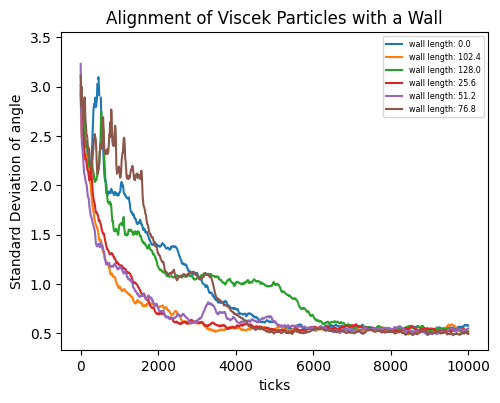

In [5]:
text_width = 5.5
fig_width = text_width
fig_height = 0.75* fig_width
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

lines, wall_lengths = [],[]

iteration = 1
for simulation in simulations[6*iteration:6*(1+iteration)]:
    steps = simulation["steps"]
    alignment_average_frames = simulation["alignment_average"]
    std_angles = np.where(simulation["angle_std"] < 0, np.nan, simulation["angle_std"])

    times = np.arange(0,steps +1, alignment_average_frames)
    line = ax.plot(times, std_angles, label = f"wall length: {simulation["wall length"]:.1f}")
    lines.append(line)
    wall_lengths.append(simulation["wall length"])


# Sort the lines based on wall lengths
sorted_indices = np.argsort(wall_lengths)
sorted_lines = [lines[i] for i in sorted_indices]
sorted_labels = [f"wall length: {wall_lengths[i]:.1f}" for i in sorted_indices]
rho = simulation["rho"]
ax.legend(fontsize = "xx-small")
ax.set_xlabel("ticks")
# ax.set_xlim(-50,5000)
ax.set_ylabel("Standard Deviation of angle")
ax.set_title("Alignment of Viscek Particles with a Wall")
# ax.set_ylim(0)
filename = f"angle_spread_rho={rho}_{steps}.png"
figures_dir = os.getcwd() + "/figures"
filepath = os.path.join(figures_dir, filename)
# plt.savefig(filepath, dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed
plt.show()

<a id = "average"></a>
[top](#top)
### Averaging the spread
to find the relaxation time

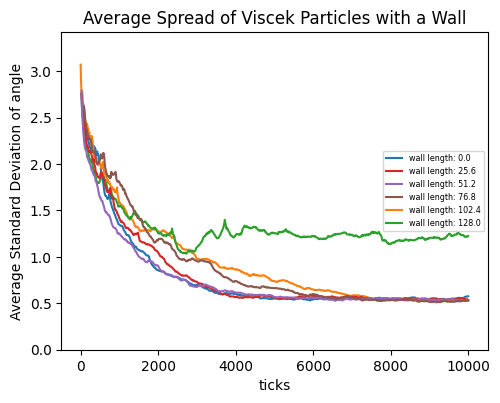

In [6]:
text_width = 5.5
fig_width = text_width
fig_height = 0.75 * fig_width
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Dictionary to store std angles for each wall length
wall_std_dict = {}

# Go through all three iterations
for iteration in [0,1,2,3,4,5]:
    for simulation in simulations[6*iteration:6*(1+iteration)]:
        wall_length = simulation["wall length"]
        steps = simulation["steps"]
        alignment_average_frames = simulation["alignment_average"]
        std_angles = np.where(simulation["angle_std"] < 0, np.nan, simulation["angle_std"])
        times = np.arange(0, steps + 1, alignment_average_frames)
        
        # Initialize list for this wall length if not exists
        if wall_length not in wall_std_dict:
            wall_std_dict[wall_length] = []
        
        # Append the std_angles for this iteration
        wall_std_dict[wall_length].append(std_angles)

# Now calculate average std for each wall length
lines = []
wall_lengths = []

for wall_length, std_list in wall_std_dict.items():
    # Convert to numpy array and calculate mean across iterations
    avg_std = np.mean(std_list, axis=0)
    
    line = ax.plot(times, avg_std, label=f"wall length: {wall_length:.1f}")[0]
    lines.append(line)
    wall_lengths.append(wall_length)

# Sort the lines based on wall lengths
sorted_indices = np.argsort(wall_lengths)
sorted_lines = [lines[i] for i in sorted_indices]
sorted_labels = [f"wall length: {wall_lengths[i]:.1f}" for i in sorted_indices]

rho = simulation["rho"]
ax.legend(sorted_lines, sorted_labels, fontsize="xx-small", loc='center right')
ax.set_xlabel("ticks")
ax.set_ylabel("Average Standard Deviation of angle")
ax.set_title("Average Spread of Viscek Particles with a Wall")
ax.set_ylim(0)

filename = f"average_angle_spread_rho={rho}_{steps}.png"
figures_dir = os.getcwd() + "/figures"
filepath = os.path.join(figures_dir, filename)
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

In [7]:
wall_lengths = sorted(wall_lengths)

<a id = "iterations"></a>

[top](#top)

## Comparing different iterations to each other

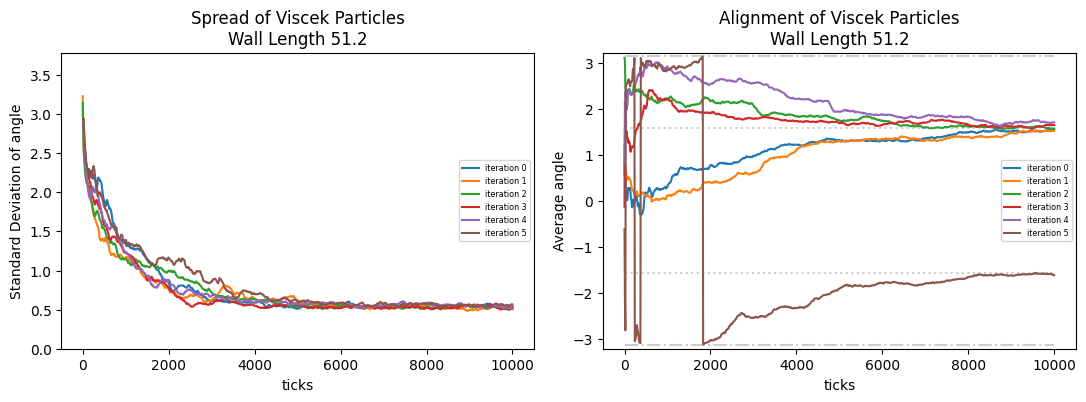

In [8]:
text_width = 5.5
fig_width = text_width
fig_height = 0.75 * fig_width
fig, ax = plt.subplots(ncols=2, figsize=(2*fig_width, fig_height))

wall_length = float(wall_lengths[-4])
for i in range(len(simulations)):
    if simulations[i]["wall length"] == wall_length:
        simulation = simulations[i]
        alignment_average_frames = simulation["alignment_average"]
        
        # Plot standard deviation
        std_angles = np.where(simulation["angle_std"] < 0, np.nan, simulation["angle_std"])
        times = np.arange(0, steps +1, alignment_average_frames)
        ax[0].plot(times, std_angles, label=f"iteration {simulation['iteration']}")
        
        # Plot alignment angle
        angle = simulation["angle"]
        ax[1].plot(times, angle, label=f"iteration {simulation['iteration']}")

rho = simulation["rho"]

# Settings for left plot (spread)
ax[0].legend(fontsize="xx-small", loc='center right')
ax[0].set_xlabel("ticks")
ax[0].set_ylabel("Standard Deviation of angle")
ax[0].set_title(f"Spread of Viscek Particles\nWall Length {wall_length:.1f}")
ax[0].set_ylim(0)

# Settings for right plot (alignment)
ax[1].legend(fontsize="xx-small", loc='center right')
ax[1].set_xlabel("ticks")
ax[1].set_ylabel("Average angle")
ax[1].set_title(f"Alignment of Viscek Particles\nWall Length {wall_length:.1f}")
ax[1].set_ylim(-3.22, 3.22)

# Add the horizontal lines for angle limits
ax[1].plot([0,times.max()],[-np.pi, -np.pi], linestyle="-.", color="grey", alpha=0.4)  # Lower angle limit
ax[1].plot([0,times.max()],[np.pi, np.pi], linestyle="-.", color="grey", alpha=0.4)    # Upper angle limit
ax[1].plot([0,times.max()],[np.pi/2, np.pi/2], linestyle="dotted", color="grey", alpha=0.4)  # Upper angle limit
ax[1].plot([0,times.max()],[-np.pi/2, -np.pi/2], linestyle="dotted", color="grey", alpha=0.4)  # Upper angle limit

plt.tight_layout()  # Adjust spacing between subplots

filename = f"max_wall_length_spread_and_alignment_rho={rho}_{steps}.png"
figures_dir = os.getcwd() + "/figures"
filepath = os.path.join(figures_dir, filename)
# plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

<a id="stream"></a>
[top](#top)
# Stream plots & histograms

2 phases:
- Transient phase: t<=3000
- Steady state phase: t>=5000

for both phases the stream plots and 2D historams can be plotted

In [9]:
def reading_stream_hist_npz(filenames, simulations):
    for item in filenames:
            
            
            if item[:7] == "WALL128":
                data = {"wall length": 0}
                folder = dir + "/" + item
                wall_length = item.split("_")[1]
                data["wall length"] = float(wall_length)

                for phase in ["transient", "steady"]:
                    ### Loading streamplot data
                    stream_data = np.load(folder + f"/{phase}_stream_plot_{wall_length}.npz")
                    stream_x = stream_data["X"]
                    stream_y = stream_data["Y"]
                    stream_boundaries = [stream_x, stream_y]
                    data[f"{phase}_stream"] = [stream_data[stream_data.files[2]],stream_data[stream_data.files[3]]]
                    data["stream_boundaries"] = stream_boundaries
                    
                    ### Loading histogram data
                    histogram_data = np.load(folder + f"/{phase}_histogram_data_{wall_length}.npz")
                    data[f"{phase}_histogram"] = histogram_data["hist"]

                ### Loading summary data
                summary_file = folder + f"/simulation_parameters_{wall_length}.txt"
                summary_data = read_summary_file(summary_file)
                # data["steps"] = summary_data['Total number of steps']
                # data["alignment_average"] = summary_data['Alignment average steps']
                data["rho"] = summary_data["Density (rho)"]
                data["eta"] = summary_data["Noise/randomness (eta)"]
                data["L"] = summary_data["Size of box (L)"]
                # data["iteration"] = iteration

                simulations.append(data)
    return simulations


simulations = reading_stream_hist_npz(os.listdir(os.getcwd()), [])

In [10]:
def plot_x_wall(ax, wall_x, wall_yMin, wall_yMax,wall_color = "blue", walpha = 1):
    """plots the boundary based on the initial dimensions of the wall set.

    Args:
        ax (matplotlib axis): input axis for the wall to be plotted onto

    Returns:
        ax: plot including the wall.
    """

    #plot the wall
    ax.plot([wall_x,wall_x],[wall_yMin,wall_yMax], label = "wall", color = wall_color, alpha = walpha)
    return ax

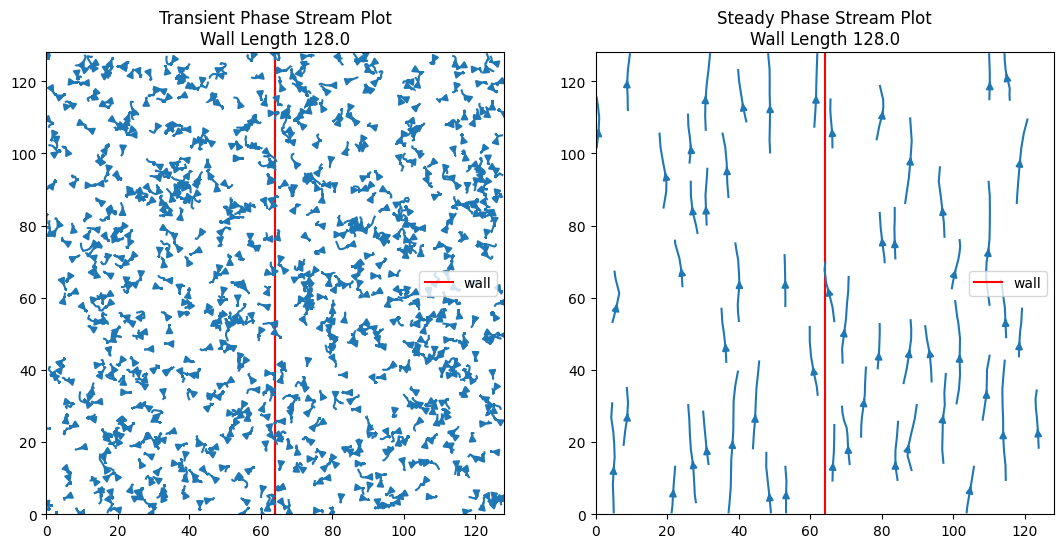

In [25]:
def stream_plot(phase,simulation, ax=None, density = 1):
    valid_phases = ["transient", "steady"]
    if phase not in valid_phases:
        raise ValueError(f"Invalid phase: '{phase}'. Valid options are {valid_phases}.")

    X,Y = simulation["stream_boundaries"]
    _Hx_stream, _Hy_stream = simulation[f"{phase}_stream"]
    if ax==None:
        fig,ax = plt.subplots()
        
    #### STREAM PLOT ##### (currently works on a for loop without the animation)
    wall_colour = "r"
    L = simulation["L"]
    wall_length = simulation["wall length"]
    x_wall = L/2
    wall_yMin = L/2 - wall_length/2
    wall_yMax = L/2 + wall_length/2
    if wall_length !=0:   ax = plot_x_wall(ax,x_wall,wall_yMin,wall_yMax,"red")
    
    ax.streamplot(X,Y,_Hx_stream,_Hy_stream, density=density)  
    ax.legend()
    ax.set_title(f"{phase.title()} Phase Stream Plot\nWall Length {wall_length:.1f}")
    return ax

fig, ax = plt.subplots(ncols=2, figsize = (13,6))
i = 1
ax[0] = stream_plot("transient", simulations[i], ax[0],6)
ax[1] = stream_plot("steady", simulations[i], ax[1],1)
for a in ax:
    a.set_xlim(0,simulations[i]["L"])
    a.set_ylim(0,simulations[i]["L"])

In [12]:
simulations[0]["steady_histogram"]

array([[417., 384., 372., ..., 433., 425., 429.],
       [389., 384., 374., ..., 385., 416., 455.],
       [397., 379., 404., ..., 396., 420., 461.],
       ...,
       [395., 392., 395., ..., 420., 403., 356.],
       [387., 406., 370., ..., 424., 409., 350.],
       [399., 373., 388., ..., 378., 436., 386.]], dtype=float16)

I am concerned that the lines are passing through the wall. One idea could be to increase the number of bins in the grid to that similar to the interaction radius of the wall and the alignment.

$r_0 = 0.65$

$r_w$ = $r_0/3$

so having a width of grids to be $\approx 0.5$ would incompass the interactions between the wall and the particles more effectively. Then to reduce the density of the lines on the stream plot there is a density parpameter in `ax.streamplot()`. This issue needs to be solved in `Viscek_wall.py` as that is where the initialisation of the stream plot is.

[top](#top)
<a id = "hist"></a>
### Histograms

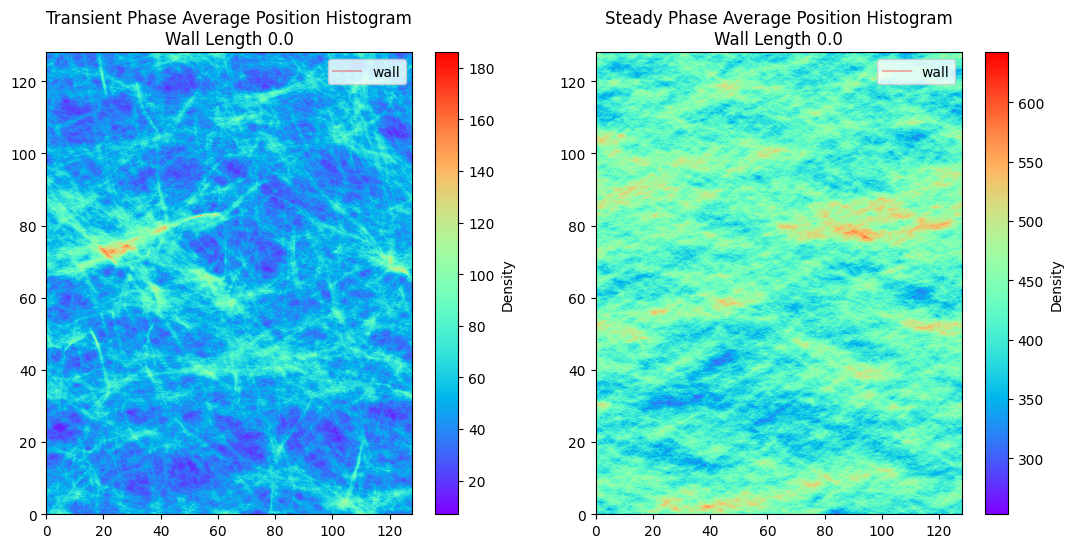

In [13]:
# #### Code below is for in file creation of analysis plots, this can be done when saved using above files.

def hist_2D_plot(phase,simulation,fig = None, ax=None, w_alpha = 1, cmap = "cividis"):
    valid_phases = ["transient", "steady"]
    if phase not in valid_phases:
        raise ValueError(f"Invalid phase: '{phase}'. Valid options are {valid_phases}.")

    X,Y = simulation["stream_boundaries"]
    hist = simulation[f"{phase}_histogram"].T
    if ax==None:
        fig,ax = plt.subplots()
    
    # Reading data out of the dictionary
    L = simulation["L"]
    wall_length = simulation["wall length"]
    x_wall = L/2
    wall_yMin = L/2 - wall_length/2
    wall_yMax = L/2 + wall_length/2

    # Plotting wall
    ax = plot_x_wall(ax,x_wall,wall_yMin,wall_yMax,"red",w_alpha)

    # Plot Histogram
    cax = ax.imshow(hist, extent=[0, L, 0, L], origin='lower', cmap=cmap, aspect='auto')
    fig.colorbar(cax, ax=ax, label='Density')   # colour bar

    # Descriptive details
    ax.legend()
    ax.set_title(f"{phase.title()} Phase Average Position Histogram\nWall Length {wall_length:.1f}")
    return fig,ax

fig, ax = plt.subplots(ncols=2, figsize = (13,6))
i = 0

cmap = "rainbow"
_,ax[0] = hist_2D_plot("transient", simulations[i], fig, ax[0], w_alpha= 0.3,cmap= cmap)
_,ax[1] = hist_2D_plot("steady", simulations[i], fig, ax[1], w_alpha= 0.3,cmap= cmap)

# Get system parameters for zooming
L = simulations[i]["L"]
wall_length = simulations[i]["wall length"]
x_wall = L/2;
zoom_distance = wall_length/2 +5
if wall_length == 0:
    zoom_distance = L/2

# Apply zoom to both axes
for a in ax:
    a.set_xlim(x_wall - zoom_distance, x_wall + zoom_distance)
    a.set_ylim(L/2 - zoom_distance, L/2 + zoom_distance)

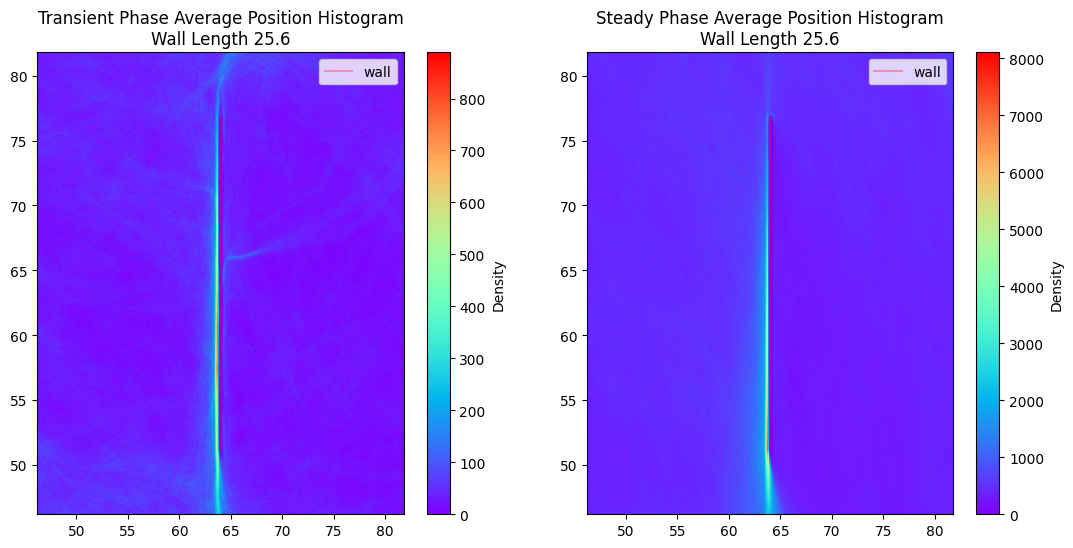

In [14]:
fig, ax = plt.subplots(ncols=2, figsize = (13,6))
i = 2

cmap = "rainbow"
_,ax[0] = hist_2D_plot("transient", simulations[i], fig, ax[0], w_alpha= 0.3,cmap= cmap)
_,ax[1] = hist_2D_plot("steady", simulations[i], fig, ax[1], w_alpha= 0.3,cmap= cmap)

# Get system parameters for zooming
L = simulations[i]["L"]
wall_length = simulations[i]["wall length"]
x_wall = L/2;
zoom_distance = wall_length/2 +5
if wall_length == 0:
    zoom_distance = L/2
if wall_length == L:
    zoom_distance = L/2

# Apply zoom to both axes
for a in ax:
    a.set_xlim(x_wall - zoom_distance, x_wall + zoom_distance)
    a.set_ylim(L/2 - zoom_distance, L/2 + zoom_distance)

<a id = align_hist_stream></a>

### comparing alignment to stream and histogram

In [15]:
def reading_all(filenames, simulations): #, hist = True, stream = True):
    for item in filenames:
        
        
        if item[:7] == "WALL128":
            data = {"wall length": 0}
            folder = dir + "/" + item
            wall_length = item.split("_")[1]
            data["wall length"] = float(wall_length)

            
            ### Loading alignment data
            alignment_data = np.load(folder + f"/alignment_{wall_length}.npz")
            data["angle"] = alignment_data["angles"]
            data["angle_std"] = alignment_data["std"]

            for phase in ["transient", "steady"]:
                ### Loading streamplot data
                stream_data = np.load(folder + f"/{phase}_stream_plot_{wall_length}.npz")
                stream_x = stream_data["X"]
                stream_y = stream_data["Y"]
                stream_boundaries = [stream_x, stream_y]
                data[f"{phase}_stream"] = [stream_data[stream_data.files[2]],stream_data[stream_data.files[3]]]
                data["stream_boundaries"] = stream_boundaries
                
                ### Loading histogram data
                histogram_data = np.load(folder + f"/{phase}_histogram_data_{wall_length}.npz")
                data[f"{phase}_histogram"] = histogram_data["hist"]

            ### Loading summary data
            summary_file = folder + f"/simulation_parameters_{wall_length}.txt"
            summary_data = read_summary_file(summary_file)
            data["steps"] = summary_data['Total number of steps']
            data["alignment_average"] = summary_data['Alignment average steps']
            data["rho"] = summary_data["Density (rho)"]
            data["eta"] = summary_data["Noise/randomness (eta)"]
            data["L"] = summary_data["Size of box (L)"]

            simulations.append(data)
    return simulations


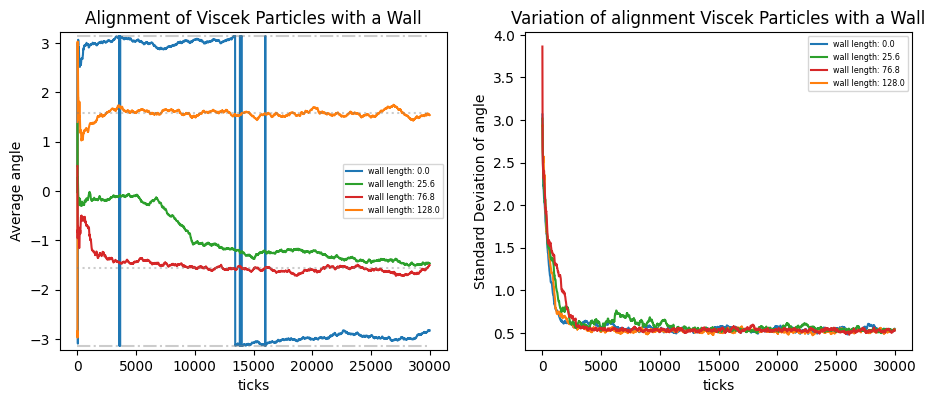

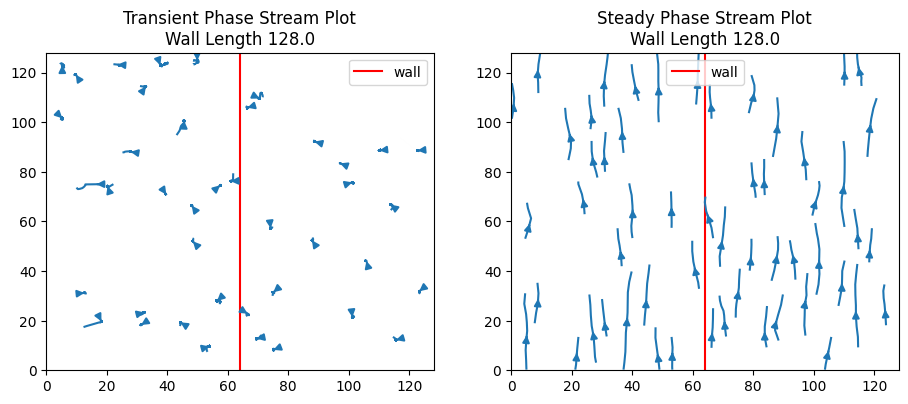

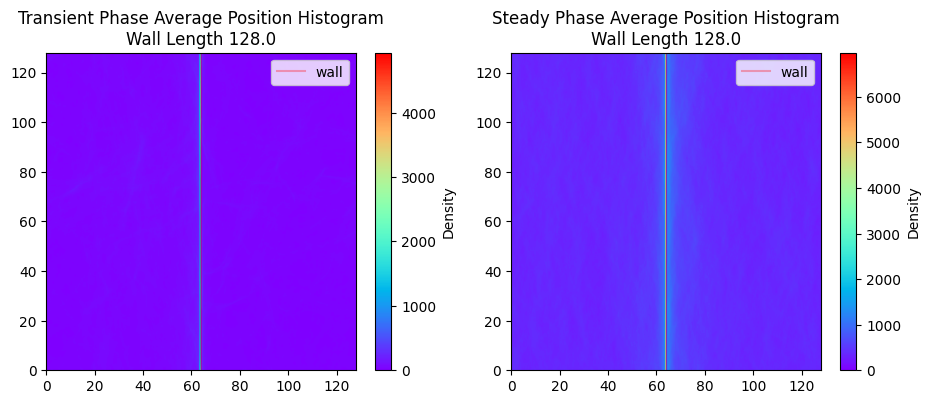

In [16]:
simulations = reading_all(filenames, [])

text_width = 5.5
fig_width = text_width
fig_height = 0.75* fig_width
fig, [ax,ax2] = plt.subplots(ncols = 2, figsize=(2*fig_width, fig_height))
# fig2,ax2 = plt.subplots(figsize=(fig_width, fig_height))
lines = []
lines2 = []
wall_lengths = []

for simulation in simulations:
    angle = simulation["angle"]
    steps = simulation["steps"]
    alignment_average_frames = simulation["alignment_average"]
    std_angles = np.where(simulation["angle_std"] < 0, np.nan, simulation["angle_std"])
    

    times = np.arange(0,steps +1, alignment_average_frames)
    line = ax.plot(times, angle, label = f"wall length: {simulation['wall length']:.1f}")[0]
    line2 = ax2.plot(times, std_angles, label = f"wall length: {simulation["wall length"]:.1f}")
    lines2.append(line2)
    lines.append(line)
    wall_lengths.append(simulation["wall length"])

rho = simulation["rho"]
eta = simulation["eta"]

# Sort the lines based on wall lengths
sorted_indices = np.argsort(wall_lengths)
sorted_lines = [lines[i] for i in sorted_indices]
sorted_lines2 = [lines[i] for i in sorted_indices]
sorted_labels = [f"wall length: {wall_lengths[i]:.1f}" for i in sorted_indices]

ax.set_ylim(-3.22,3.22)
ax.legend(sorted_lines, sorted_labels, fontsize="xx-small", loc = "center right")
ax.plot([0,times.max()],[-np.pi, -np.pi], linestyle = "-.", color = "grey", alpha = 0.4) ## Lower angle limit
ax.plot([0,times.max()],[np.pi, np.pi], linestyle = "-.", color = "grey", alpha = 0.4) ## Upper angle limit
ax.plot([0,times.max()],[np.pi/2, np.pi/2], linestyle = "dotted", color = "grey", alpha = 0.4) ## Upper angle limit
ax.plot([0,times.max()],[-np.pi/2, -np.pi/2], linestyle = "dotted", color = "grey", alpha = 0.4) ## Upper angle limit
ax.set_xlabel("ticks")
ax.set_ylabel("Average angle")
ax.set_title("Alignment of Viscek Particles with a Wall")



ax2.legend(sorted_lines2, sorted_labels, fontsize = "xx-small")
ax2.set_xlabel("ticks")
# ax2.set_xlim(-50,5000)
ax2.set_ylabel("Standard Deviation of angle")
ax2.set_title("Variation of alignment Viscek Particles with a Wall")


filename = f"alignment_rho={rho}_{steps}.png"
figures_dir = os.getcwd() + "/figures"
filepath = os.path.join(figures_dir, filename)
# plt.savefig(filepath, dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed
plt.show()



i = 1
fig, ax = plt.subplots(ncols=2, figsize =(2*fig_width, fig_height))
ax[0] = stream_plot("transient", simulations[i], ax[0])
ax[1] = stream_plot("steady", simulations[i], ax[1])
for a in ax:
    a.set_xlim(0,simulations[i]["L"])
    a.set_ylim(0,simulations[i]["L"])

fig, ax = plt.subplots(ncols=2, figsize=(2*fig_width, fig_height))
cmap = "rainbow"
_,ax[0] = hist_2D_plot("transient", simulations[i], fig, ax[0], w_alpha= 0.3,cmap= cmap)
_,ax[1] = hist_2D_plot("steady", simulations[i], fig, ax[1], w_alpha= 0.3,cmap= cmap)

# Get system parameters for zooming
L = simulations[i]["L"]
wall_length = simulations[i]["wall length"]
x_wall = L/2;
zoom_distance = wall_length/2 +5
if wall_length == 0:
    zoom_distance = L/2
if wall_length == L:
    zoom_distance = L/2

# Apply zoom to both axes
for a in ax:
    a.set_xlim(x_wall - zoom_distance, x_wall + zoom_distance)
    a.set_ylim(L/2 - zoom_distance, L/2 + zoom_distance)
plt.show()


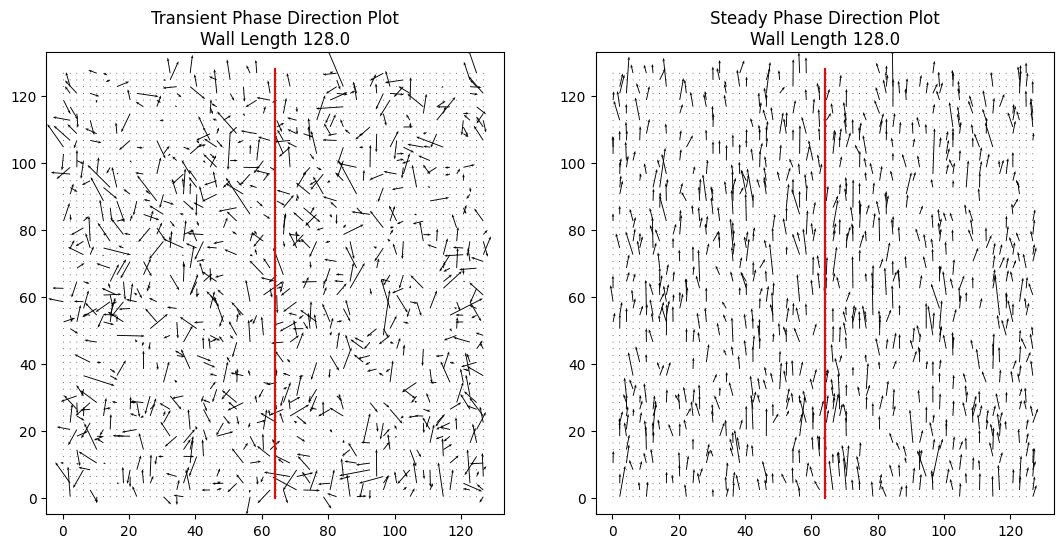

In [35]:
def quiver_plot(phase, simulation, ax=None, step=8):
   if ax is None:
       fig, ax = plt.subplots()
   
   X, Y = simulation["stream_boundaries"]
   Hx, Hy = simulation[f"{phase}_stream"]
   
   X_reduced = X[::step, ::step]
   Y_reduced = Y[::step, ::step]
   Hx_reduced = Hx[::step, ::step] 
   Hy_reduced = Hy[::step, ::step]
   
   # Calculate magnitudes and use max for scaling
   magnitudes = np.sqrt(Hx_reduced**2 + Hy_reduced**2)
   scale = 10 * np.max(magnitudes)  # Adjust multiplier as needed
   
   wall_length = simulation["wall length"]
   x_wall = simulation["L"]/2
   wall_yMin = simulation["L"]/2 - wall_length/2
   wall_yMax = simulation["L"]/2 + wall_length/2
   if wall_length != 0:
       ax = plot_x_wall(ax, x_wall, wall_yMin, wall_yMax, "red")
   
   ax.quiver(X_reduced, Y_reduced, Hx_reduced, Hy_reduced, 
             scale=scale, width=0.002,
             headwidth=3, headlength=4, headaxislength=3)
   ax.set_title(f"{phase.title()} Phase Direction Plot\nWall Length {wall_length:.1f}")
   
   return ax

fig, ax = plt.subplots(ncols=2, figsize = (13,6))
i = 1

cmap = "rainbow"
ax[0] = quiver_plot("transient", simulations[i], ax[0], step = 4)
ax[1] = quiver_plot("steady", simulations[i], ax[1], step = 4)

# Get system parameters for zooming
L = simulations[i]["L"]
wall_length = simulations[i]["wall length"]
x_wall = L/2;
zoom_distance = wall_length/2 +5
if wall_length == 0:
    zoom_distance = L/2

# Apply zoom to both axes
for a in ax:
    a.set_xlim(x_wall - zoom_distance, x_wall + zoom_distance)
    a.set_ylim(L/2 - zoom_distance, L/2 + zoom_distance)